In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#df.drop_duplicates(inplace=True) supprime les lignes qui presentent les meme valeurs de colonne dans le df
df = pd.read_csv("données sans doublon.csv")

display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [44]:
df['is_smoker'] = (df['smoker'] == 'yes').astype(int)  # ajoute une colonne is_smoker au df avec 1 pour fumeur, O sinon, astype convertit directement les booléens en 1 ou 0

result= (df.groupby("region").agg(
   bmi_mean=("bmi","mean"),
   charges_moyennes=("charges","mean"),
   nb_enfants_moy=("children", "mean"),
   percent_fumeurs= ("is_smoker", "mean")))

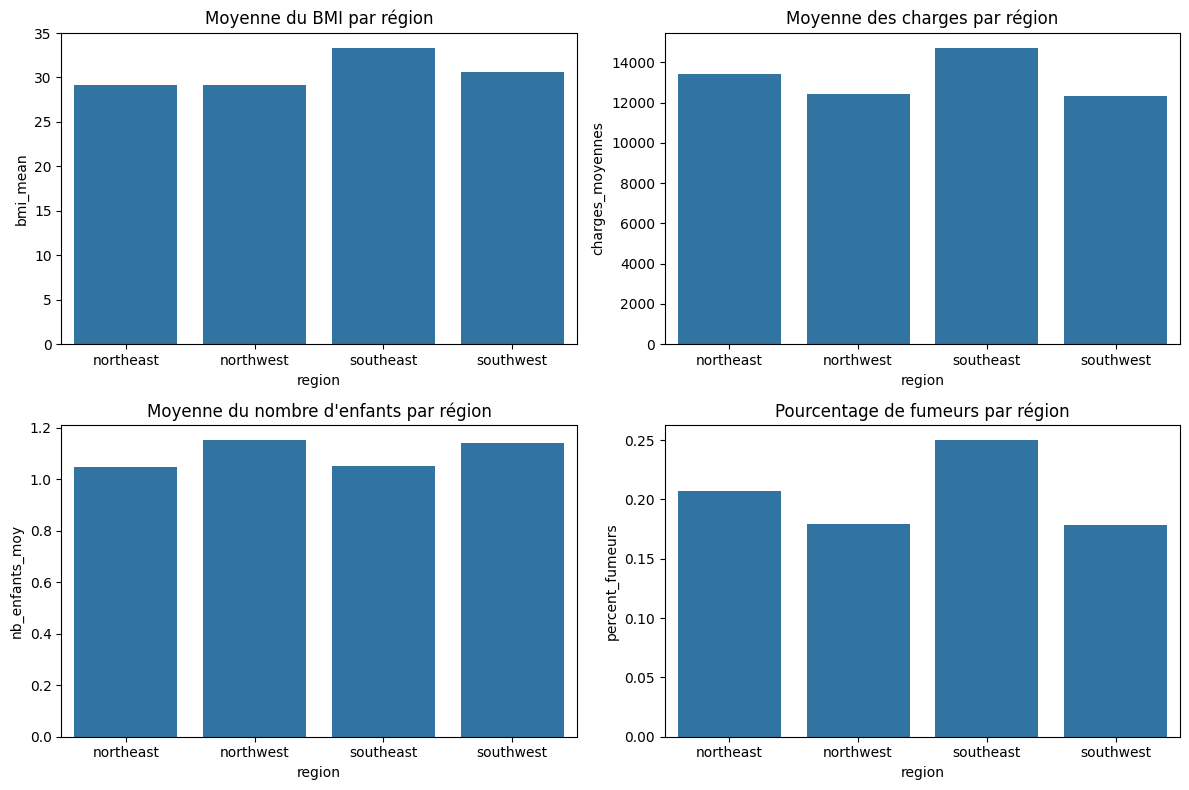

In [45]:

# Supposons que 'result' contient les résultats agrégés que vous avez obtenus avec le code précédent

plt.figure(figsize=(12, 8))

# Barres pour la moyenne du BMI par région
plt.subplot(2, 2, 1)
sns.barplot(x='region', y='bmi_mean', data=result)
plt.title('Moyenne du BMI par région')

# Barres pour la moyenne des charges par région
plt.subplot(2, 2, 2)
sns.barplot(x='region', y='charges_moyennes', data=result)
plt.title('Moyenne des charges par région')

# Barres pour la moyenne du nombre d'enfants par région
plt.subplot(2, 2, 3)
sns.barplot(x='region', y='nb_enfants_moy', data=result)
plt.title('Moyenne du nombre d\'enfants par région')

# Barres pour le pourcentage de fumeurs par région
plt.subplot(2, 2, 4)
sns.barplot(x='region', y='percent_fumeurs', data=result)
plt.title('Pourcentage de fumeurs par région')

plt.tight_layout()
plt.show()


In [18]:
df["children"].describe()

df.groupby('children').children.count()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [468]:
display(df["smoker"].describe())

display(df.groupby('smoker').smoker.count())

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

smoker
no     1063
yes     274
Name: smoker, dtype: int64

In [469]:
display(df["region"].describe())

display(df.groupby('region').region.count())

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object

region
northeast    324
northwest    324
southeast    364
southwest    325
Name: region, dtype: int64

In [24]:
display(df["charges"].describe())

display(df[df["charges"] < 4746.344000])


count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

,age,sex,bmi,children,smoker,region,charges,group,bmi_class
1,18,male,33.770,1,no,southeast,1725.55230,1,"35.0, 39.0"
2,28,male,33.000,3,no,southeast,4449.46200,1,"35.0, 39.0"
4,32,male,28.880,0,no,northwest,3866.85520,1,"30.0, 34.9"
5,31,female,25.740,0,no,southeast,3756.62160,1,"30.0, 34.9"
10,25,male,26.220,0,no,northeast,2721.32080,1,"30.0, 34.9"
...,...,...,...,...,...,...,...,...,...
1316,18,male,53.130,0,no,southeast,1163.46270,1,NaN
1323,31,male,25.935,1,no,northwest,4239.89265,1,"30.0, 34.9"
1333,18,female,31.920,0,no,northeast,2205.98080,1,"35.0, 39.0"
1334,18,female,36.850,0,no,southeast,1629.83350,1,40.0<


### MAPPING

In [471]:
mapping = {'male': 0, 'female': 1}

df_mapping = df[['sex', 'charges']]
df_mapping['sex'] = df_mapping['sex'].map(mapping)

display(df_mapping)

/tmp/ipykernel_38553/393739012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mapping['sex'] = df_mapping['sex'].map(mapping)


,sex,charges
0,1,16884.92400
1,0,1725.55230
2,0,4449.46200
3,0,21984.47061
4,0,3866.85520
...,...,...
1332,0,10600.54830
1333,1,2205.98080
1334,1,1629.83350
1335,1,2007.94500


In [47]:
df_group = df

df_group['group'] = np.where(df_group['charges'] < 4746.344000, '1', 
                             np.where(df_group['charges'] < 9386.161300, '2', 
                             np.where(df_group['charges'] < 16657.717450, '3', '4')))

# df_age['group_age'] = df_age['group'] + '|' + df_age['age'].astype(str)

df_age = df_group[['age', 'charges']]
df_age = df_age.groupby(['age']).agg({'charges': 'mean'}).reset_index()

df_sex = df_group[['sex', 'group']]
df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex']
df_sex = df_sex[['group_sex']]
df_sex = df_sex.groupby(['group_sex']).agg({'group_sex': 'count'})
df_sex['group'] = df_sex.index
df_sex['sex'] = df_sex.index
df_sex['group'] = df_sex['group'].str[0]
df_sex['sex'] = df_sex['sex'].str[2:]
df_sex = df_sex.pivot_table(values='group_sex', index=['group'], columns='sex', aggfunc='sum').reset_index()

display(df_age, df_sex)

/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_3236/789872840.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex']


,age,charges
0,18,7086.217556
1,19,9868.929428
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802
5,23,12419.820040
6,24,10648.015962
7,25,9838.365311
8,26,6133.825309
9,27,12184.701721


sex,group,female,male
0,1,160,174
1,2,170,164
2,3,185,149
3,4,147,188


<Figure size 800x800 with 0 Axes>

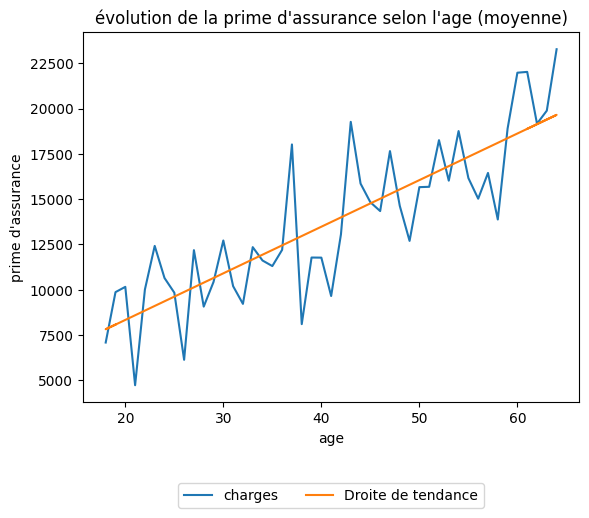

In [46]:
df_graph = pd.DataFrame(df_age)

# Création d'un graphique de lignes pour plusieurs séries de données
plt.figure(figsize=(8, 8))  # Définit la taille de la figure

df_graph.plot(x='age', y=['charges'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('age')
plt.ylabel("prime d'assurance")
plt.title("évolution de la prime d'assurance selon l'age (moyenne)")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['age'], df['charges'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['age'], tendance(df['age']), label='Droite de tendance')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

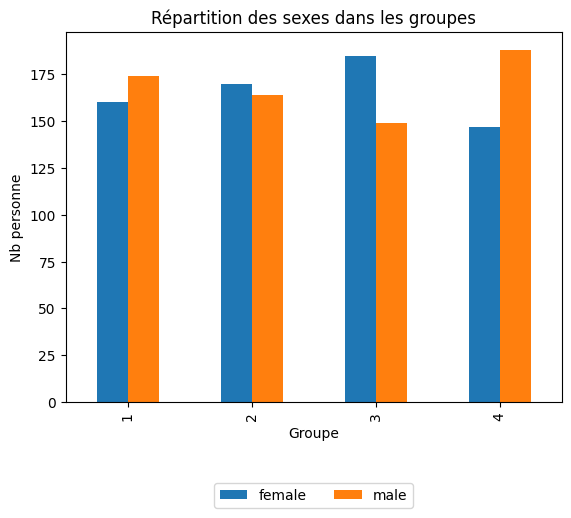

In [474]:
df_sex = pd.DataFrame(df_sex)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_sex.plot(x='group', y=['female', 'male'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des sexes dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


Etudions l'évolution de la prime d'assurances en fonction du BMI

/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_3236/2780922190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi['bmi_class'] = pd.cut(df_bmi['bmi'], bins=bins, labels=classes, include_lowest=True)
/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_3236/2780922190.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_moyennes_par_classe = df_bmi.groupby('bmi_class')['charges'].mean()
/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_3236/2780922190.py:12: FutureWarning: The default of observed=False is deprecated a

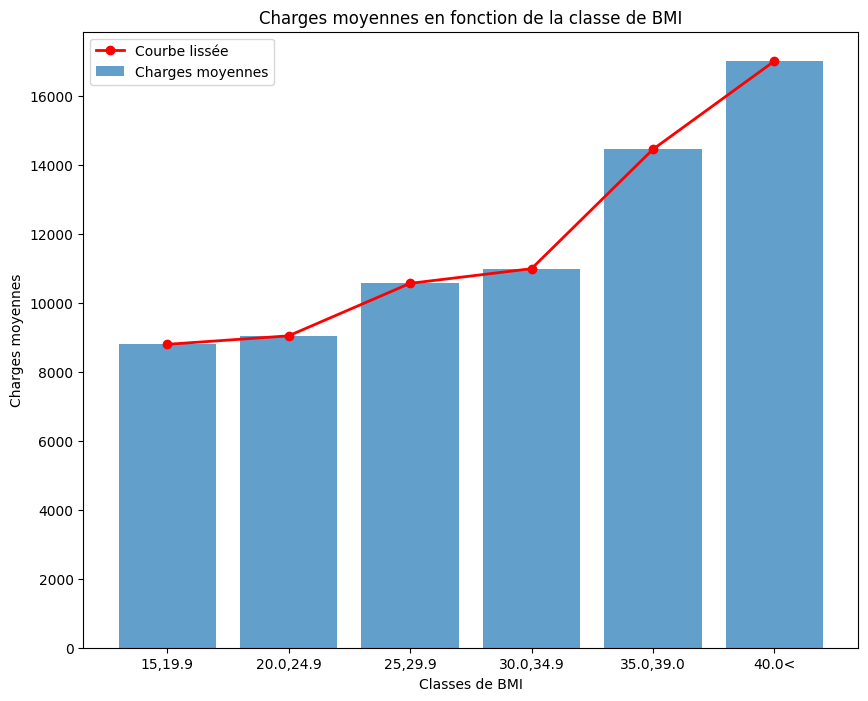

In [49]:
classes = ['15,19.9', '20.0,24.9', '25,29.9', '30.0,34.9', '35.0,39.0', '40.0<']
bins = [15, 19.9, 20, 25, 30, 35, 40]

df_bmi['bmi_class'] = pd.cut(df_bmi['bmi'], bins=bins, labels=classes, include_lowest=True)

charges_moyennes_par_classe = df_bmi.groupby('bmi_class')['charges'].mean()

plt.figure(figsize=(10, 8))
plt.bar(charges_moyennes_par_classe.index, charges_moyennes_par_classe, alpha=0.7, label='Charges moyennes')

# Ajustez la taille de la fenêtre glissante pour démarrer à la première barre
charges_moyennes_par_classe_droite = df_bmi.groupby('bmi_class')['charges'].mean().rolling(window=1, min_periods=1).mean()

plt.plot(charges_moyennes_par_classe_smooth.index, charges_moyennes_par_classe_smooth, color='red', linewidth=2, marker='o', label='Courbe lissée')

plt.xlabel('Classes de BMI')
plt.ylabel('Charges moyennes')
plt.title('Charges moyennes en fonction de la classe de BMI')
plt.legend()

# Afficher le graphique
plt.show()


En regardant l'évolution de la courbe, on remarque que lorsque le BMI augmente, la prime augmente. Il serait intéressant d'étudier la corrélation entre ces variables.